## Car Theft

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

path = %pwd

path = path + '/dc-crimes-search-results.csv'


In [2]:
path

'/Users/gannon/Documents/Projects/car_theft/dc-crimes-search-results.csv'

In [3]:
crimes = pd.read_csv(path, engine='c')

In [4]:
crimes.tail()

,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,offensegroup,LONGITUDE,END_DATE,offense-text,SHIFT,YBLOCK,DISTRICT,WARD,...,BLOCK,START_DATE,CCN,OFFENSE,OCTO_RECORD_ID,ANC,REPORT_DAT,METHOD,location,LATITUDE
67721,cluster 21,10600.0,property,-77.008555,2020-01-07T10:30:39.000,theft f/auto,day,138079.0,5.0,5,...,1 - 38 block of florida avenue ne,2020-01-07T09:20:03.000,20003780,theft f/auto,20003780-01,5E,2020-01-07T15:40:06.000Z,others,"38.910580563668759,-77.0085574739431",38.910573
67722,cluster 22,9102.0,property,-76.993761,NaN,theft/other,day,139301.0,5.0,5,...,2300 - 2499 block of washington place ne,2020-01-07T11:22:42.000,20003828,theft/other,20003828-01,5C,2020-01-07T17:39:07.000Z,others,"38.92158889501443,-76.993763643182518",38.921581
67723,cluster 2,2802.0,violent,-77.032476,2020-01-03T12:10:36.000,robbery,day,139908.0,3.0,1,...,2900 - 2999 block of 14th street nw,2020-01-03T12:00:18.000,20001591,robbery,20001591-01,1A,2020-01-03T18:56:26.000Z,others,"38.927052598274997,-77.032477999428352",38.927045
67724,cluster 35,7603.0,property,-76.965838,NaN,theft/other,day,132500.0,6.0,7,...,2800 - 2999 block of alabama avenue se,2020-01-03T13:17:24.000,20001606,theft/other,20001606-01,7B,2020-01-03T18:40:36.000Z,others,"38.86031811095588,-76.965840185194324",38.860310
67725,cluster 16,1600.0,property,-77.030607,2020-01-03T09:30:25.000,theft f/auto,evening,145719.0,4.0,4,...,1300 - 1318 block of geranium street nw,2020-01-02T21:00:09.000,20001619,theft f/auto,20001619-01,4A,2020-01-03T20:59:51.000Z,others,"38.9794001638707,-77.030609130236073",38.979392


In [5]:
crimes.describe()

,CENSUS_TRACT,LONGITUDE,YBLOCK,DISTRICT,WARD,YEAR,PSA,ucr-rank,XBLOCK,CCN,LATITUDE
count,67595.000000,67726.000000,67726.000000,67719.000000,67726.000000,67726.000000,67719.000000,67726.000000,67726.000000,6.772600e+04,67726.000000
mean,6203.503602,-77.009557,137816.957804,3.603922,4.308966,2018.524939,365.160841,6.105011,399171.609189,1.865325e+07,38.908207
std,3184.512675,0.035990,3273.990171,1.846067,2.288824,0.522924,184.281885,1.241661,3121.423423,7.101514e+05,0.029492
min,100.000000,-77.114142,127432.000000,1.000000,1.000000,2018.000000,101.000000,1.000000,390103.000000,7.006630e+06,38.814659
25%,3500.000000,-77.031963,136376.000000,2.000000,2.000000,2018.000000,207.000000,6.000000,397228.000000,1.812685e+07,38.895228
50%,6900.000000,-77.015679,137710.000000,3.000000,5.000000,2019.000000,307.000000,6.000000,398640.000000,1.900591e+07,38.907238
75%,9000.000000,-76.986916,139623.750000,5.000000,6.000000,2019.000000,505.000000,7.000000,401135.000000,1.913235e+07,38.924486
max,11100.000000,-76.910021,147307.000000,7.000000,8.000000,2020.000000,708.000000,9.000000,407806.000000,9.160350e+07,38.993694


In [6]:
crimes.shape

(67726, 29)

In [7]:
crimes[crimes.offensekey.str.contains("motor vehicle theft")].shape

(4588, 29)

In [8]:
pd.set_option('display.max_columns', 500)
auto_theft = crimes[crimes.offensekey.str.contains("motor vehicle theft")]

In [9]:
# Get the data we actually care about
cols = ['LATITUDE', 'LONGITUDE', 'START_DATE', 'OFFENSE', 'REPORT_DAT']

auto_theft = auto_theft[cols]

In [10]:
# Boundaries of our map
BBox = [auto_theft.LATITUDE.min(), auto_theft.LATITUDE.max(), auto_theft.LONGITUDE.min(), auto_theft.LONGITUDE.max()]

In [11]:
print(BBox[0], BBox[1], BBox[2], BBox[3])

38.819380588485295 38.991387480259704 -77.1119534851003 -76.9100205381868


In [12]:
path = %pwd
path = path + '/dc map.png'

In [13]:
dc_map = plt.imread(path)

In [14]:
auto_theft.LATITUDE = auto_theft.LATITUDE - .01

In [15]:
auto_theft.LONGITUDE = auto_theft.LONGITUDE + .01

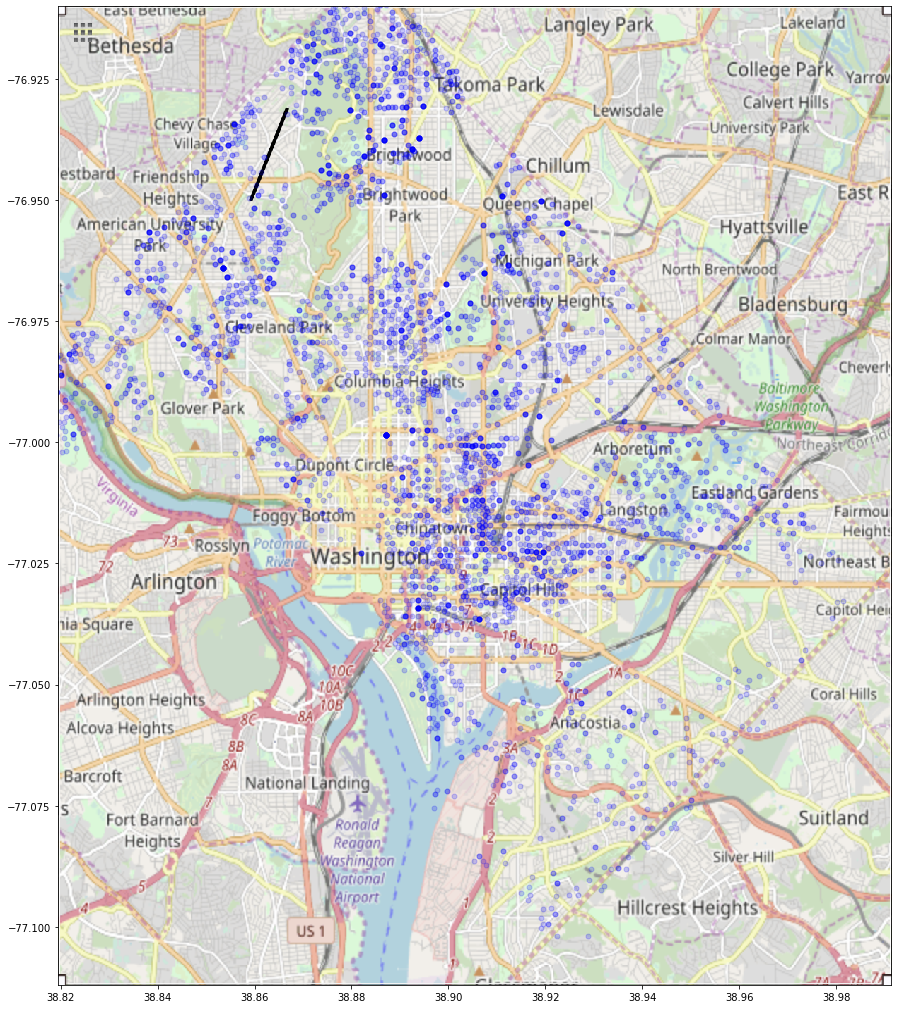

In [16]:
fig, ax = plt.subplots(figsize= (18, 18))
ax.set_xlim(BBox[0],BBox[1]);
ax.set_ylim(BBox[2],BBox[3]);
ax.scatter(auto_theft.LATITUDE, auto_theft.LONGITUDE, zorder = 1, alpha = 0.2, c = 'b', s = 24);
#ax.set_title('Where People in DC Get Their Shit Jacked')

ax.imshow(dc_map, zorder=0, extent = BBox, aspect= 'equal');


In [18]:
# Check timeline of data
auto_theft.tail(10000)

,LATITUDE,LONGITUDE,START_DATE,OFFENSE,REPORT_DAT
16,38.880858,-76.903676,2018-09-04T13:50:40.000,motor vehicle theft,2018-09-04T18:12:37.000Z
28,38.888789,-76.922723,2018-09-11T20:00:00.000,motor vehicle theft,2018-09-13T02:02:45.000Z
51,38.876800,-76.979281,2018-07-27T09:49:47.000,motor vehicle theft,2018-07-27T16:37:33.000Z
61,38.879072,-76.928841,2018-08-04T08:40:11.000,motor vehicle theft,2018-08-04T13:35:08.000Z
70,38.904816,-77.000677,2018-08-13T02:26:31.000,motor vehicle theft,2018-08-13T12:13:25.000Z
...,...,...,...,...,...
67663,38.878664,-76.974589,2020-01-07T21:50:03.000,motor vehicle theft,2020-01-08T13:17:04.000Z
67669,38.882653,-76.966231,2020-01-03T07:50:52.000,motor vehicle theft,2020-01-04T15:05:27.000Z
67699,38.889572,-77.040793,2020-01-03T15:00:51.000,motor vehicle theft,2020-01-05T01:11:35.000Z
67707,38.970382,-77.024889,2020-01-06T02:30:34.000,motor vehicle theft,2020-01-06T08:08:52.000Z


In [21]:
type(auto_theft.START_DATE.iloc[1])

str

In [22]:
# convert to datetime type
auto_theft.head()

,LATITUDE,LONGITUDE,START_DATE,OFFENSE,REPORT_DAT
16,38.880858,-76.903676,2018-09-04T13:50:40.000,motor vehicle theft,2018-09-04T18:12:37.000Z
28,38.888789,-76.922723,2018-09-11T20:00:00.000,motor vehicle theft,2018-09-13T02:02:45.000Z
51,38.876800,-76.979281,2018-07-27T09:49:47.000,motor vehicle theft,2018-07-27T16:37:33.000Z
61,38.879072,-76.928841,2018-08-04T08:40:11.000,motor vehicle theft,2018-08-04T13:35:08.000Z
70,38.904816,-77.000677,2018-08-13T02:26:31.000,motor vehicle theft,2018-08-13T12:13:25.000Z


In [23]:
date_strings = list(auto_theft.START_DATE.str.slice(0,10))

In [33]:
auto_theft.iloc[2,2]

AttributeError: 'str' object has no attribute 'todatetime'

In [347]:
auto_theft.START_DATE = pd.to_datetime(auto_theft.START_DATE)
auto_theft.REPORT_DAT = pd.to_datetime(auto_theft.REPORT_DAT)

In [348]:
type(auto_theft.START_DATE.iloc[2])

pandas._libs.tslibs.timestamps.Timestamp

In [349]:
auto_theft.dtypes

LATITUDE                  float64
LONGITUDE                 float64
START_DATE         datetime64[ns]
OFFENSE                    object
REPORT_DAT    datetime64[ns, UTC]
dtype: object

In [350]:
auto_theft.START_DATE.max() - auto_theft.START_DATE.min()

Timedelta('1019 days 06:50:01')

In [351]:
dates = list(auto_theft.START_DATE)

In [45]:
# Turn date strings into datetime objects

# Check that our df is still what we expect

auto_theft.START_DATE = pd.to_datetime(auto_theft.START_DATE)

In [82]:
day_list = list(auto_theft.START_DATE.dt.dayofweek)

In [85]:
[day_list.count(i) for i in list(range(7))]

[692, 645, 616, 619, 663, 664, 689]

ValueError: shape mismatch: objects cannot be broadcast to a single shape

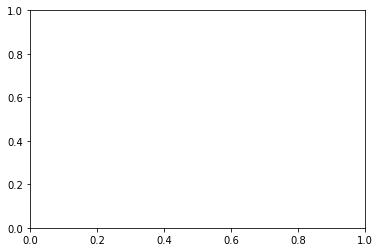

In [80]:
plt.bar(list(range(7)), day_list)

bins = list(range(7))

fig, ax = plt.subplots()
ax.hist(day_list, bins)

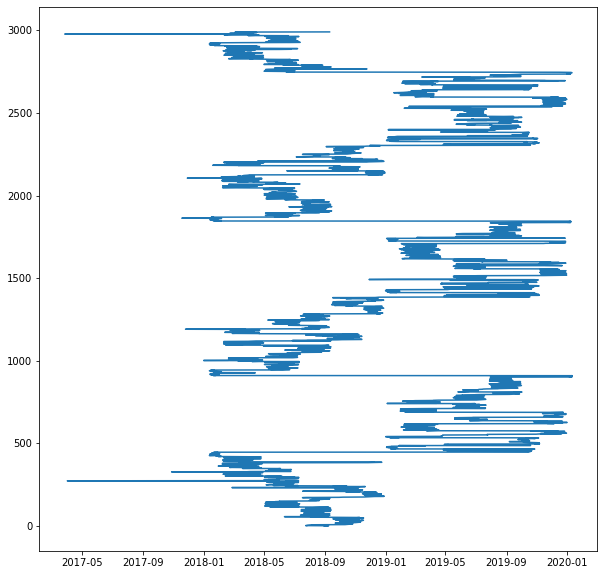

In [298]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(dates[9:3000], [i for i in range(len(dates[9:3000]))])

In [358]:
date_strings[2].count('-07-')

1

In [300]:
date_strings.count('-04-')

0

In [355]:
type(date_strings[0])

str

In [366]:
nums = ['-01-', '-02-', '-03-', '-04-', '-05-', '-06-', '-07-', '-08-', '-09-', '-10-', '-11-', '-12-', ]

monthly_thefts = [sum([date_strings[i].count(j) for i in range(len(date_strings))]) for j in nums]

<BarContainer object of 12 artists>

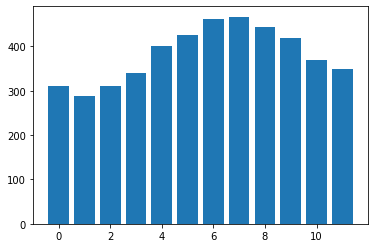

In [370]:
plt.bar(range(12), monthly_thefts)